In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
df=pd.read_csv("C:\\Users\\Avijit\\Downloads\\wine.csv")

In [3]:
df.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [4]:
df.corr()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,1.000000,-0.017654,-0.020082,0.010262,-0.031383,-0.015706,0.027252,-0.019597,-0.022799,0.016261,0.004897,0.005677,0.025684
fixed acidity,-0.017654,1.000000,-0.318436,0.695937,0.216517,0.173142,-0.238656,-0.129428,0.615600,-0.673701,0.142432,-0.025393,0.073852
volatile acidity,-0.020082,-0.318436,1.000000,-0.585697,-0.080067,0.034741,0.052753,0.083324,-0.075160,0.244171,-0.344014,-0.216296,-0.219287
citric acid,0.010262,0.695937,-0.585697,1.000000,0.145187,0.141347,-0.191566,-0.085734,0.376759,-0.558444,0.260027,0.082065,0.141797
residual sugar,-0.031383,0.216517,-0.080067,0.145187,1.000000,0.086790,-0.098746,-0.022819,0.283797,-0.107332,0.031908,0.077594,0.048156
chlorides,-0.015706,0.173142,0.034741,0.141347,0.086790,1.000000,-0.049006,0.008749,0.250453,-0.128262,0.047200,-0.149921,-0.046624
free sulfur dioxide,0.027252,-0.238656,0.052753,-0.191566,-0.098746,-0.049006,1.000000,0.637849,-0.067456,0.139392,-0.048248,-0.114734,-0.060217
total sulfur dioxide,-0.019597,-0.129428,0.083324,-0.085734,-0.022819,0.008749,0.637849,1.000000,0.112278,-0.016654,-0.151012,-0.319857,-0.225670
density,-0.022799,0.615600,-0.075160,0.376759,0.283797,0.250453,-0.067456,0.112278,1.000000,-0.388449,-0.002249,-0.355750,-0.153198
pH,0.016261,-0.673701,0.244171,-0.558444,-0.107332,-0.128262,0.139392,-0.016654,-0.388449,1.000000,-0.045728,0.125008,0.016378


In [5]:
y=df['quality']

In [6]:
#x=df[df.columns[1:12]]
x=df

In [7]:
#x['acidity']=x['fixed acidity']+x['volatile acidity']
#x['dioxide']=x['total sulfur dioxide']-x['free sulfur dioxide']
x

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.20,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.30,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.10,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.60,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.30,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,2051,6.6,0.31,0.13,2.00,0.056,29.0,42.0,0.99388,3.52,0.87,12.0,7
2052,2052,9.7,0.59,0.21,1.80,0.079,27.0,65.0,0.99745,3.14,0.58,9.4,5
2053,2053,7.7,0.43,0.42,1.70,0.071,19.0,37.0,0.99258,3.32,0.77,12.5,8
2054,2054,9.1,0.50,0.00,1.75,0.058,5.0,13.0,0.99670,3.22,0.42,9.5,5


<AxesSubplot:>

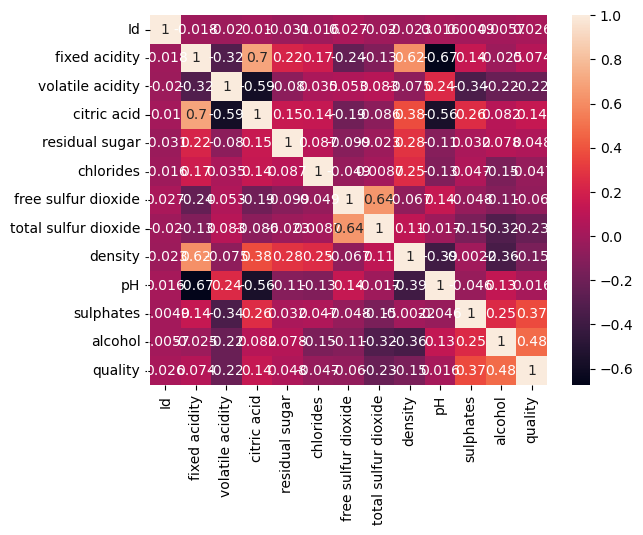

In [8]:
sns.heatmap(x.corr(), annot=True)

In [9]:
#x=x[['sulphates','alcohol','dioxide']]
x=x.drop('quality',axis='columns')

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101) 

In [11]:
from sklearn.linear_model import LinearRegression 
lm = LinearRegression() 
lm.fit(X_train, y_train)

LinearRegression()

In [12]:
print(lm.intercept_)

25.275340904152998


In [13]:
coeff_df = pd.DataFrame(lm.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Id,0.000047
fixed acidity,0.029340
volatile acidity,-0.058457
citric acid,0.068556
residual sugar,0.026999
chlorides,0.332775
free sulfur dioxide,0.006125
total sulfur dioxide,-0.001872
density,-24.751877
pH,0.105630


In [14]:
predictions = lm.predict(X_test)  
lm.score(X_train, y_train)
#plt.scatter(y_test,predictions)

0.3418531961539023

In [15]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5687487326707523
MSE: 0.5429635997768648
RMSE: 0.7368606379613888
